# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 15.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
160972,0.7666,0.0391,0.0293,0.0024,0.0024,0.0195,0.1440,0.6738,0.0024,0.0317,0,0,0,0
399060,0.4810,0.0342,0.0049,0.0024,0.0024,0.0073,0.1465,0.5444,0.0024,0.0464,0,0,0,0
208841,0.0464,0.0024,0.0024,0.0024,0.0024,0.0122,0.4541,0.2539,0.0024,0.1074,0,0,0,0
61493,0.4541,0.0342,0.3052,0.0391,0.0146,0.0464,1.0254,0.6006,0.2246,0.1807,3,3,8,8
416923,0.7324,0.1196,0.0610,0.0098,0.0073,0.0488,0.3076,0.9131,0.0171,0.0562,9,9,18,18


In [3]:
raw_data.shape

(478193, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478193 entries, 0 to 478192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          478193 non-null  float64
 1   Emg2          478193 non-null  float64
 2   Emg3          478193 non-null  float64
 3   Emg4          478193 non-null  float64
 4   Emg5          478193 non-null  float64
 5   Emg6          478193 non-null  float64
 6   Emg7          478193 non-null  float64
 7   Emg8          478193 non-null  float64
 8   Emg9          478193 non-null  float64
 9   Emg10         478193 non-null  float64
 10  repetition    478193 non-null  int64  
 11  rerepetition  478193 non-null  int64  
 12  stimulus      478193 non-null  int64  
 13  restimulus    478193 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 51.1 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000
mean,0.501572,0.151599,0.169478,0.056115,0.023732,0.065833,0.550883,0.589846,0.165808,0.288571,3.102268,2.235315,5.525838,4.065892
std,0.428903,0.262973,0.299034,0.130464,0.044097,0.111559,0.646651,0.384964,0.348622,0.376059,3.475910,3.261604,6.578251,6.221459
min,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217300,0.002400,0.002400,0.002400,0.002400,0.004900,0.124500,0.329600,0.002400,0.051300,0.000000,0.000000,0.000000,0.000000
50%,0.410200,0.036600,0.019500,0.002400,0.002400,0.024400,0.327100,0.485800,0.002400,0.136700,2.000000,0.000000,3.000000,0.000000
75%,0.649400,0.178200,0.214800,0.051300,0.022000,0.075700,0.727500,0.737300,0.183100,0.383300,6.000000,4.000000,10.000000,7.000000
max,4.663100,3.642600,4.658200,3.710900,0.874000,1.750500,4.663100,4.199200,4.658200,3.754900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     207859
8      15597
7      15587
12     15585
4      15574
6      15559
9      15555
2      15554
5      15547
11     15531
10     15526
3      15520
1      15515
14     10404
13     10399
17     10398
15     10361
16     10323
19      5929
21      5198
18      5193
20      5161
22      5161
23      5157
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

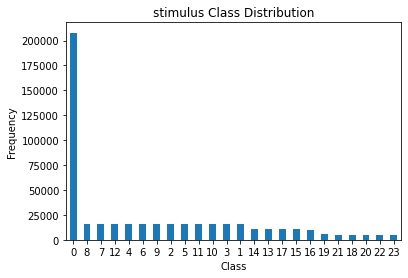

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
411011,0.8618,0.0928,0.0610,0.0122,0.0415,0.1270,0.4004,0.7227,0.0024,0.1294,2,2,18,18
335031,0.8643,0.1294,0.4639,0.1172,0.0488,0.1147,0.9766,0.6934,0.5127,0.4736,3,3,10,10
439998,0.5713,0.0098,0.0024,0.0024,0.0024,0.0024,0.1904,0.5444,0.0024,0.0317,0,0,0,0
44378,0.4736,0.3687,0.1538,0.0171,0.0269,0.1440,2.3120,0.6323,0.2295,1.0059,3,3,6,6
290786,0.5981,0.0562,0.5664,0.5322,0.1025,0.1611,0.9204,0.7520,0.5859,0.5713,6,6,5,5


In [12]:
raw_data.shape

(395231, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395231 entries, 0 to 478192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          395231 non-null  float64
 1   Emg2          395231 non-null  float64
 2   Emg3          395231 non-null  float64
 3   Emg4          395231 non-null  float64
 4   Emg5          395231 non-null  float64
 5   Emg6          395231 non-null  float64
 6   Emg7          395231 non-null  float64
 7   Emg8          395231 non-null  float64
 8   Emg9          395231 non-null  float64
 9   Emg10         395231 non-null  float64
 10  repetition    395231 non-null  int64  
 11  rerepetition  395231 non-null  int64  
 12  stimulus      395231 non-null  int64  
 13  restimulus    395231 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 45.2 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 79.3173681480638


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     40780
           1       0.72      0.73      0.72      2304
           2       0.60      0.60      0.60      1970
           3       0.69      0.69      0.69      2146
           4       0.65      0.64      0.65      2172
           5       0.62      0.64      0.63      1921
           6       0.71      0.70      0.71      1967
           7       0.64      0.64      0.64      2377
           8       0.64      0.65      0.64      2261
           9       0.61      0.62      0.62      2141
          10       0.68      0.66      0.67      2305
          11       0.65      0.65      0.65      2182
          12       0.66      0.66      0.66      2233
          13       0.62      0.63      0.62      1299
          14       0.65      0.65      0.65      1612
          15       0.63      0.65      0.64      1578
          16       0.66      0.65      0.65      1547
 

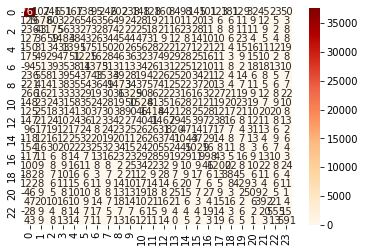

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.5776310296405935
MSE: 18.127632927245816
RMSE: 4.257655801875701


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.7935644046766624
Recall Score :  0.793173681480638
f1_score :  0.793337412895086


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.48987311346414


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     40780
           1       0.91      0.89      0.90      2304
           2       0.87      0.80      0.83      1970
           3       0.92      0.87      0.89      2146
           4       0.91      0.86      0.88      2172
           5       0.90      0.83      0.86      1921
           6       0.93      0.89      0.91      1967
           7       0.88      0.80      0.84      2377
           8       0.92      0.83      0.87      2261
           9       0.91      0.81      0.86      2141
          10       0.92      0.84      0.88      2305
          11       0.93      0.86      0.89      2182
          12       0.90      0.84      0.87      2233
          13       0.92      0.83      0.88      1299
          14       0.91      0.82      0.86      1612
          15       0.89      0.80      0.84      1578
          16       0.93      0.85      0.89      1547
 

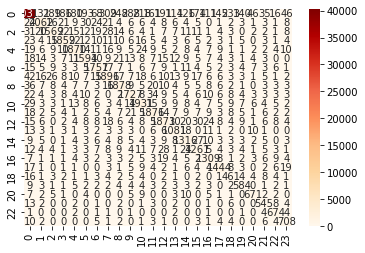

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7037079206041975
MSE: 8.519539008438018
RMSE: 2.918824936243696


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.914565782535697
Recall Score :  0.9148987311346414
f1_score :  0.912937119222333


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.04970460612041


Classification report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     40780
           1       0.95      0.90      0.93      2304
           2       0.95      0.79      0.86      1970
           3       0.95      0.88      0.92      2146
           4       0.95      0.87      0.91      2172
           5       0.95      0.84      0.90      1921
           6       0.97      0.91      0.94      1967
           7       0.94      0.83      0.88      2377
           8       0.95      0.84      0.89      2261
           9       0.96      0.81      0.88      2141
          10       0.95      0.88      0.91      2305
          11       0.97      0.87      0.92      2182
          12       0.96      0.88      0.92      2233
          13       0.97      0.86      0.91      1299
          14       0.96      0.86      0.91      1612
          15       0.93      0.85      0.89      1578
          16       0.96      0.88      0.92      1547
 

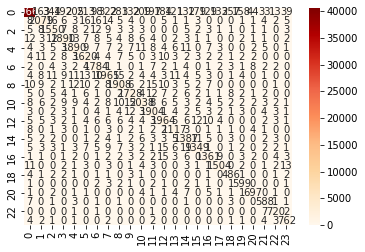

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6037167760952344
MSE: 7.489645400837476
RMSE: 2.7367216520569784


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9327022178527629
Recall Score :  0.9304970460612041
f1_score :  0.9289791934807251


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.79222487886953


Classification report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     40780
           1       0.92      0.88      0.90      2304
           2       0.93      0.77      0.84      1970
           3       0.92      0.85      0.88      2146
           4       0.91      0.85      0.88      2172
           5       0.92      0.81      0.86      1921
           6       0.95      0.89      0.92      1967
           7       0.91      0.80      0.85      2377
           8       0.92      0.82      0.86      2261
           9       0.94      0.79      0.86      2141
          10       0.92      0.86      0.89      2305
          11       0.94      0.84      0.89      2182
          12       0.92      0.85      0.89      2233
          13       0.95      0.83      0.88      1299
          14       0.93      0.83      0.88      1612
          15       0.89      0.83      0.86      1578
          16       0.91      0.86      0.88      1547
 

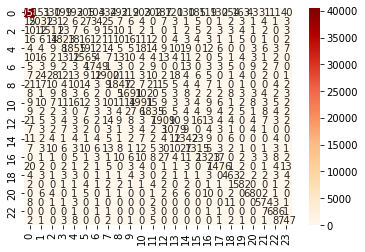

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6816957000265664
MSE: 8.218629423001506
RMSE: 2.866815205589908


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9186574449361746
Recall Score :  0.9179222487886953
f1_score :  0.9158291499694259


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 84.02595923943983


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     40780
           1       0.82      0.77      0.79      2304
           2       0.72      0.61      0.66      1970
           3       0.77      0.74      0.75      2146
           4       0.77      0.66      0.71      2172
           5       0.75      0.64      0.69      1921
           6       0.88      0.76      0.82      1967
           7       0.73      0.62      0.67      2377
           8       0.74      0.67      0.70      2261
           9       0.78      0.63      0.70      2141
          10       0.78      0.73      0.75      2305
          11       0.80      0.67      0.73      2182
          12       0.75      0.69      0.72      2233
          13       0.79      0.65      0.71      1299
          14       0.77      0.65      0.70      1612
          15       0.71      0.67      0.69      1578
          16       0.76      0.71      0.73      1547
 

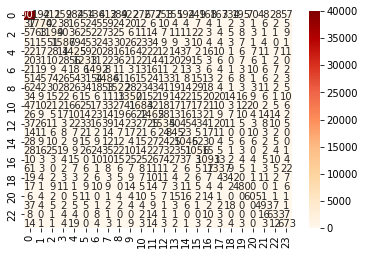

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.2105962275608182
MSE: 13.895732918390324
RMSE: 3.7276980723216204


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8340149732122267
Recall Score :  0.8402595923943983
f1_score :  0.8339635908257066
